# **Group 8 Project Proposal - User Knowledge Modeling Data Set**
Authors: Minting Fu, Zeti Batrisha Jamiluddin Amini, Liz Ji, Caroline Zhang

## INTRODUCTION

In this project, we will study a data set of <a href="https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling" target="_blank">403 real user knowledge status in the area of Electrical DC Machines</a>, which is originated from the Ph.D. Thesis.

We would like to investigate this question through our project:

* If there is a relationship between STG, SCG, STR, LPR, PEG and UNS?


The user modeling system classifies UNS (the knowledge level of users) depending on the real-values of 5 attributes. They are:

* STG : The degree of study time for goal object materails.
* SCG : The degree of repetition number of user for goal object materails.
* STR : The degree of study time of user for related objects with goal object.
* LPR : The exam performance of user for related objects with goal object.
* PEG : The exam performance of user for goal objects.
* UNS : The knowledge level of user.

## Citation
Dua, D. and Graff, C. (2019). <a href="http://archive.ics.uci.edu/ml" target="_blank">UCI Machine Learning Repository</a>. Irvine, CA: University of California, School of Information and Computer Science.

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.

## Data Analysis

In [1]:
#Import the pacakge we need to analyze the data
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [11]:
# download the file from the website
url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls'
download.file(url, destfile='data/user_knowledge_data.xls')

# read and clean the training data and the test data
training_data <- read_excel('data/user_knowledge_data.xls', sheet=2, range='A1:F259') %>% 
                mutate(UNS = as_factor(UNS)) 

test_data <- read_excel('data/user_knowledge_data.xls', sheet=3, range='A1:F146') %>% 
                mutate(UNS = as_factor(UNS))

print("Training Data")
training_data

print("Test Data")
test_data


[1] "Training Data"


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


[1] "Test Data"


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


In [18]:
# summarize the distribution of UNS in training data and test data
uns_dist_training <- training_data %>%
                     group_by(UNS) %>%
                     summarize(n = n())

uns_dist_test <- test_data %>%
                 group_by(UNS) %>%
                 summarize(n = n())
print("The distribution of UNS in training data")
uns_dist_training

print("The distribution of UNS in test data")
uns_dist_test

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



[1] "The distribution of UNS in training data"


UNS,n
<fct>,<int>
very_low,24
High,63
Low,83
Middle,88


[1] "The distribution of UNS in test data"


UNS,n
<fct>,<int>
Very Low,26
Low,46
High,39
Middle,34


In [17]:
# summarise the training data
training_data_max <- training_data %>%
                     select(-UNS) %>%
                     map_df(max, na.rm = TRUE)


training_data_min <- training_data %>%
                     select(-UNS) %>%
                     map_df(min, na.rm = TRUE)


training_data_avg <- training_data %>%
                     select(-UNS) %>%
                     map_df(mean, na.rm = TRUE)


training_data_max
training_data_min
training_data_avg

STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.99,0.9,0.95,0.99,0.93


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


## Scatter plot

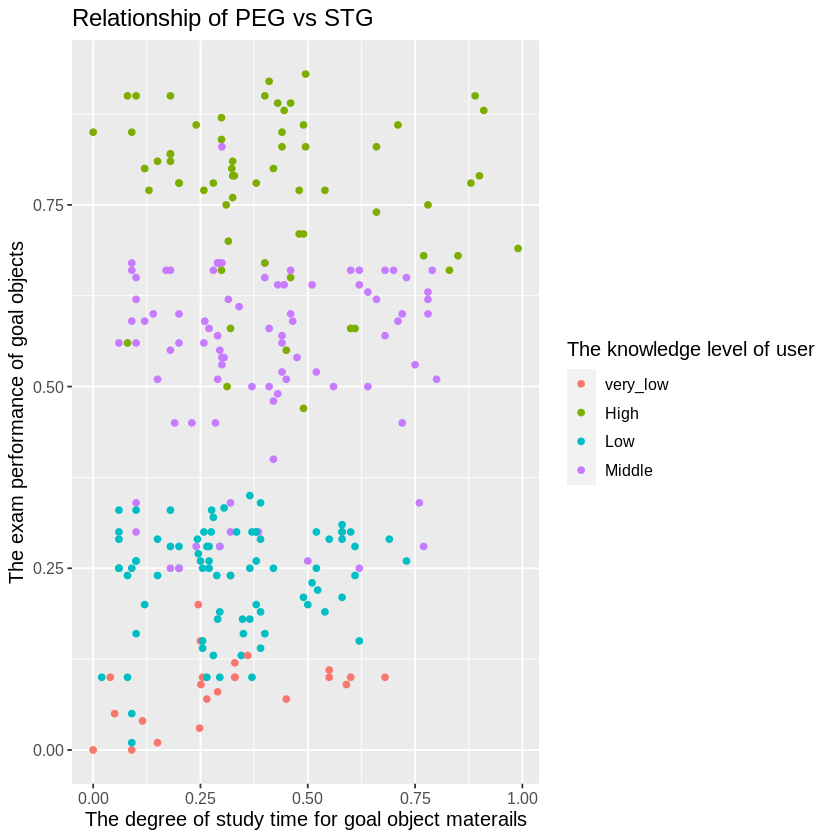

In [19]:
#Need to beautify
peg_vs_stg <- training_data %>%
            ggplot(aes(x = STG, y = PEG , color = UNS)) +
            geom_point() +
            labs(x = "The degree of study time for goal object materails", y = "The exam performance of goal objects", color = "The knowledge level of user", title = "Relationship of PEG vs STG") +
            theme(text = element_text(size = 12))
peg_vs_stg

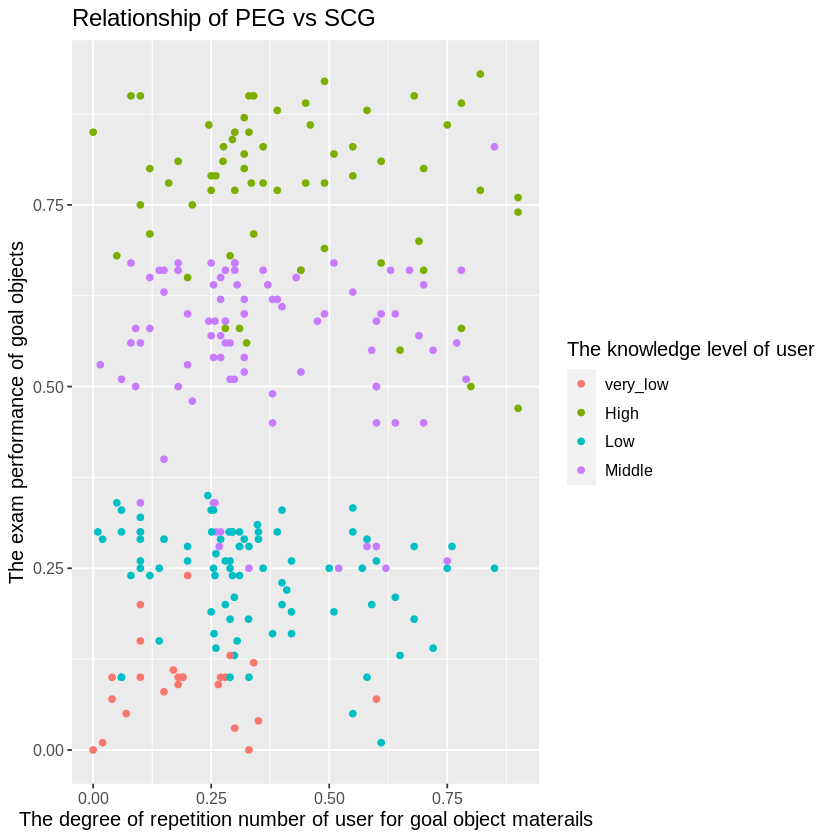

In [20]:
peg_vs_scg <- training_data %>%
            ggplot(aes(x = SCG, y = PEG , color = UNS)) +
            geom_point() +
            labs(x = "The degree of repetition number of user for goal object materails", y = "The exam performance of goal objects", color = "The knowledge level of user", title = "Relationship of PEG vs SCG") +
            theme(text = element_text(size = 12))
peg_vs_scg

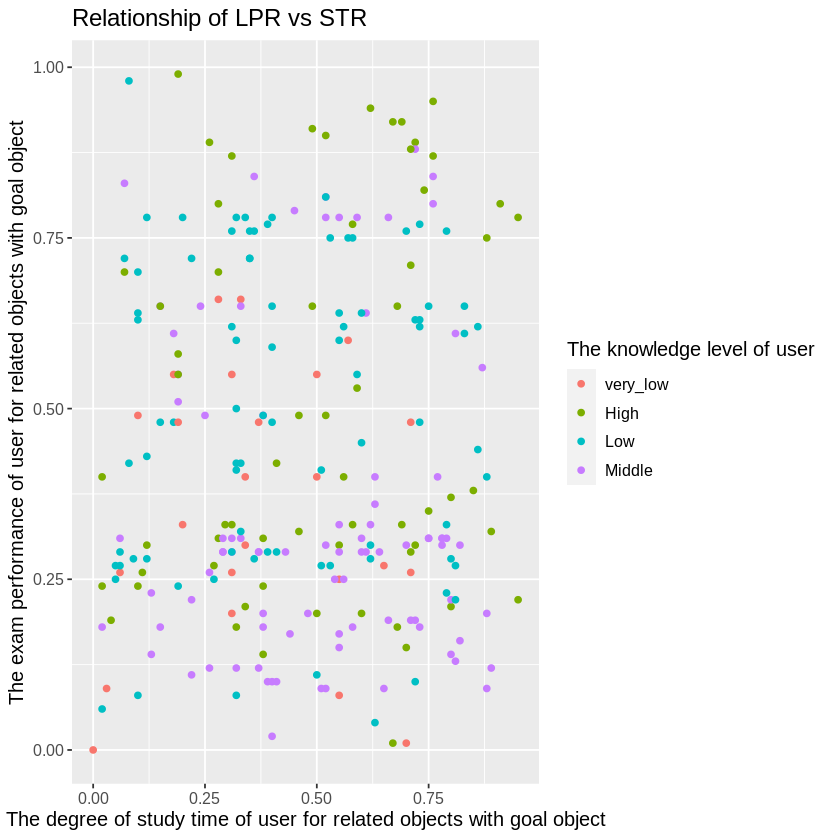

In [21]:
lpr_vs_str <- training_data %>%
            ggplot(aes(x = STR, y = LPR , color = UNS)) +
            geom_point() +
            labs(x = "The degree of study time of user for related objects with goal object", y = "The exam performance of user for related objects with goal object", color = "The knowledge level of user", title = "Relationship of LPR vs STR") +
            theme(text = element_text(size = 12))
lpr_vs_str

## Method we use

## Expected outcomes and expectations